# Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating the data

In [26]:
n_size = 100

x1 = np.random.multivariate_normal(mean = np.array([1,0]), cov = np.array([[0.5,0.3], [0.3, 0.4]]), size=n_size)
x2 = np.random.multivariate_normal(mean = np.array([0,1]), cov = np.array([[0.5,0.3], [0.3, 0.2]]), size=n_size)
X = np.random.normal(loc = [0,0], scale=[1,1], size = [30,2])

y = np.concat([np.zeros(n_size), np.zeros(n_size)], axis= 0)

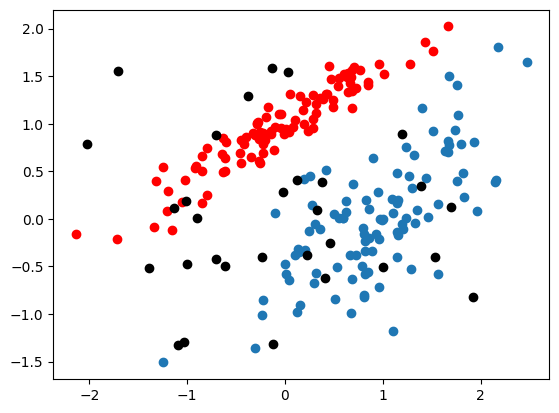

In [3]:
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1], color="red")
plt.scatter(X[:,0], X[:,1], color="black")

# K-NN model

In [ ]:
def k_nn_point(x, x1, x2, k):
    distances = np.linalg.norm(x - np.concat([x1, x2], axis = 1))
    np.
    distances.sort()
    k_count_0 = 0
    k_count_1 = 0
    #print(f"distances k : {distances[:k]}")
    for _, group in distances[:k]:
        if group == 0:
            k_count_0 += 1
        else:
            k_count_1 += 1
            
    if k_count_0 < k_count_1:
        return 1
    return 0

k_nn_point(X[0], x1, x2, 5)

0

In [ ]:
k = 5

distances = np.linalg.norm(X[0] - np.concat([x1, x2], axis=0), axis=1)
min_index = np.argsort(distances)[:k]
votes = y[min_index]


In [5]:
def k_nn(X, x1, x2, k = 5):
    n_output = int(X.shape[0])
    y = np.ones(n_output, dtype=int)
    for i, point in enumerate(X):
        y[i] = k_nn_point(point, x1, x2, k)
    return y
    
y = k_nn(X, x1, x2)

# Plot resutls

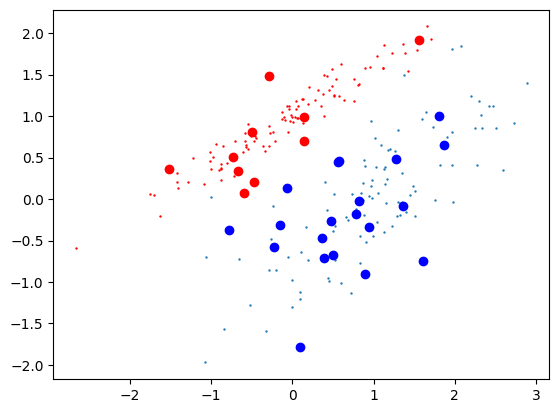

In [8]:
mask_0 = y == 0

plt.scatter(x1[:,0], x1[:,1], s = 0.5)
plt.scatter(x2[:,0], x2[:,1], color="red", s = 0.5)

plt.scatter(X[mask_0,0], X[mask_0,1], color="blue")
plt.scatter(X[~mask_0,0], X[~mask_0,1], color="red")